In [3]:
import re
import jieba
import pandas as pd

import string

# 讀取文件
with open('tp.txt', 'r', encoding='utf-8') as file:
    text = file.read()

In [4]:
# 將特定中文字進行替換
text = text.replace('的', '').replace('在', '').replace('與', '').replace('為', '').replace('是', '').replace('而', '').replace('於', '').replace('和', '').replace('對', '').replace('了', '').replace('也', '')

In [5]:
# 進行正則表達匹配
pattern = r'[ \u4e00-\u9fa5 ]+'
matches = re.findall(pattern, text)

In [6]:
# 打印匹配到的單詞
print("匹配到的單詞：", matches)

匹配到的單詞： ['概念分析', ' ', '方永泉', '教育大辭書', '名詞解釋', '概念分析', '一詞', '簡單說來便概念進行分析', '由', '概念', '用以說明某些特定事物或事情重點', '因此實際上過濾人們世界經驗', '世界人們來說', '並非以井然有序面貌出現', '以致人經驗呈現著紛繁現象', '使世界人產生意義', '勢必經驗加以分類', '所謂', '概念分析', '便以批判', '整合等方式來評斷用這世界某些特定概念否適宜', '若適宜', '要進一步分析用何處及何用', '哲學方面', '主張以', '概念分析', '作研究途徑哲學家', '近幾十年來支配英語世界哲學風氣', '這些學者將哲學當作一種', '分析活動', ' ', '主張藉著概念分析嚴謹方法來釐清哲學園地中含混不清語言', '觀念', '問題預設等', '期能掃除思想上非迷霧', '不容許非定非', '或造成範疇失誤', ' ', ' ', '有關哲學具有概念分析之功能說法', '並非二十世紀哲學創見', '事實上哲學中分析精神可說哲學史一般古老', '如我國孔子', '知之知之', '不知不知', '及荀子', '非非謂之知', '非定非謂之愚', '說法', '就表示儒家早已存著', '審問', '慎思', '明辨', '分析精神', '西方希臘哲人蘇格拉底', ' ', ' ', '常自承', '吾知吾之無知', '其再傳弟子亞里斯多德', ' ', ' ', '曾言', '其所非', '或非其所', '假', '其所', '或非其所非', '真', '這種說法我國有異曲同工之處', '時至今日', '蘇格拉底所問兩個問題', '你意思', '你怎麼知道', '仍概念分析中所最常分析兩個問題', '前者意詰問定義', '後者則闡明', '何以如此如此', '理由', ' ', '不過概念分析哲學蔚然成風', '仍二十世紀初英美哲人努力有密切關係', '經過穆爾', ' ', ' ', '維根史坦', ' ', ' ', '等人分析哲學', ' ', '方面努力後', '萊爾', ' ', ' ', '艾爾', ' ', ' ', '等人認自二十世紀起', '哲學已發展到一個新階段', '正', '哲學革命', ' ', ' ', '時候', '他們認哲學任

In [7]:
with open('matches.txt', 'w', encoding='utf-8') as match_file:
    match_file.write(''.join(matches))

In [8]:
with open('matches.txt', 'r', encoding='utf-8') as file:
    text_ = file.read()

In [10]:
# 使用jieba進行中文分詞
seg_list = jieba.cut(text_, cut_all=False)

# 將分詞结果轉換成列表
seg_list = list(seg_list)

# 創建一个DataFrame
df = pd.DataFrame(seg_list, columns=['分詞结果'])

In [11]:
# 顯示DataFrame
print(df)

      分詞结果
0     概念分析
1         
2      方永泉
3       教育
4       大辭
...    ...
4779    當代
4780    知識
4781    理論
4782     頗
4783   具影響

[4784 rows x 1 columns]


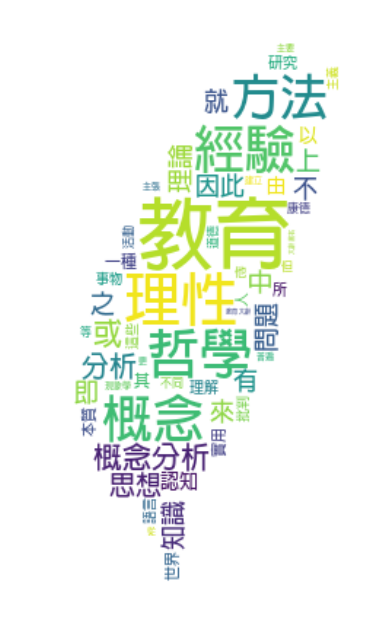

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# 指定中文字體
font_path = "AdobeFanHeitiStd-Bold.otf"  

# 文字雲造型圖片
mask = np.array(Image.open('taiwan.jpg'))  # 文字雲遮罩形狀

seg_text = ' '.join(seg_list)

# 創建詞雲對象並設置字體
wordcloud = WordCloud(font_path=font_path, width=800, height=500, background_color='white', mask=mask).generate(seg_text)

# 繪製詞雲
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()